In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
#importing libraries 
import pandas as pd 
import seaborn as sns
import itertools
import warnings 
warnings.filterwarnings("ignore")
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
import os

In [3]:
matches=pd.read_csv("WorldCupMatches.csv")
players=pd.read_csv("WorldCupPlayers.csv")
cups=pd.read_csv("WorldCups.csv")
display("MATCHES-DATA")
display(matches.head(3))
display("PLAYERS-DATA")
display(players.head(3))
display("WORLD CUPS-DATA")
display(cups.head(3))

'MATCHES-DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


'PLAYERS-DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


'WORLD CUPS-DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [4]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [50]:
sns.set_style("darkgrid")

In [5]:
#removing duplicates rows for match id columns 
matches=matches.drop_duplicates(subset="MatchID",keep="first")

In [6]:
#removing null vaalues 
matches=matches[matches["Year"].notnull()]

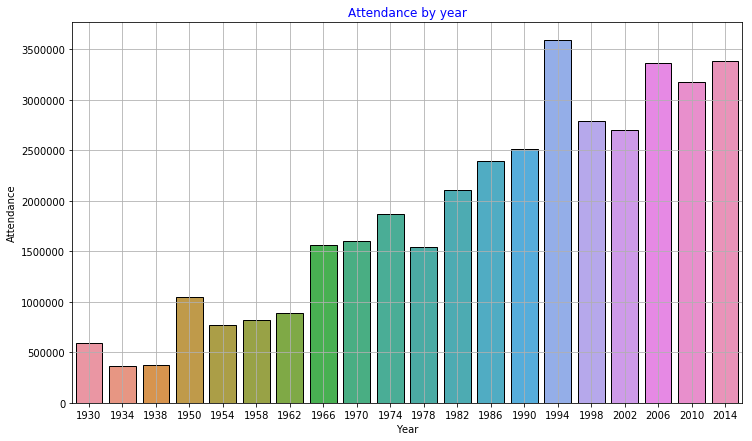

In [7]:
att=matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"]=att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att['Year'],att['Attendance'],linewidth=1,edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendance by year",color='b')
plt.show()

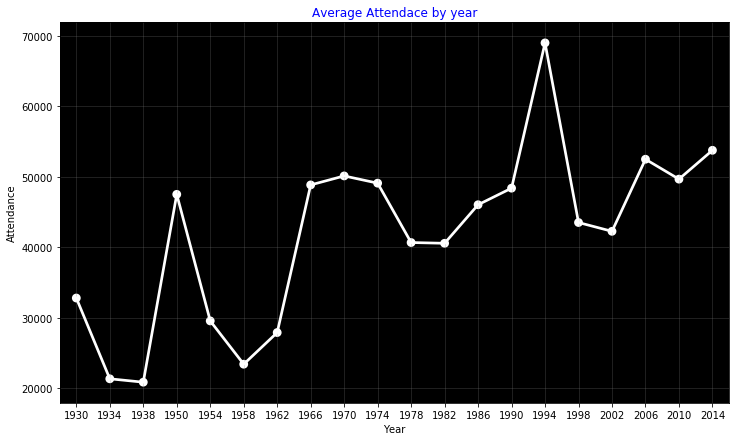

In [8]:
att1=matches.groupby("Year")["Attendance"].mean().reset_index()
att1["Year"]=att1["Year"].astype(int)
plt.figure(figsize=(12,7))
ax=sns.pointplot(att1["Year"],att1["Attendance"],color="w")
ax.set_facecolor("k")
plt.grid(True,color="grey",alpha=.3)
plt.title("Average Attendace by year",color='b')
plt.show()

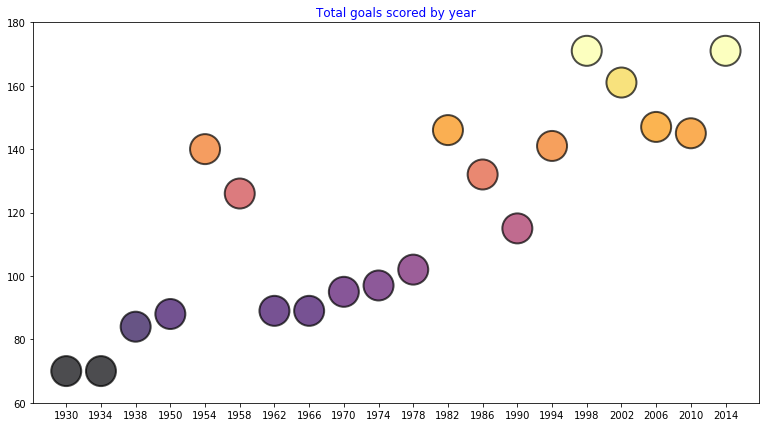

In [9]:
#total goals scored by year
plt.figure(figsize=(13,7))
cups["Year1"]=cups["Year"].astype(str)
ax=plt.scatter("Year1","GoalsScored",data=cups,c=cups["GoalsScored"],cmap="inferno",s=900,alpha=.7,linewidth=2,edgecolor="k",)
plt.xticks(cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.show()

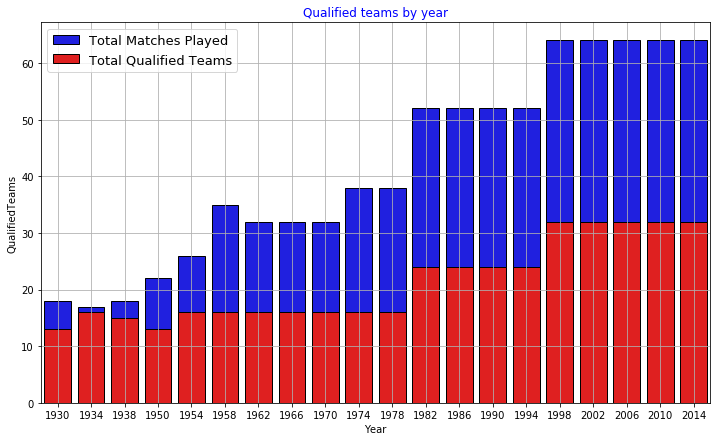

In [10]:
#Total matches played and qualified team by year
plt.figure(figsize=(12,7))
sns.barplot(cups["Year"],cups["MatchesPlayed"],linewidth=1,edgecolor="k"*len(cups)
           ,color="b",label="Total Matches Played")
sns.barplot(cups["Year"],cups["QualifiedTeams"],linewidth=1,
           edgecolor="k"*len(cups),color="r",label="Total Qualified Teams")
plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.show()

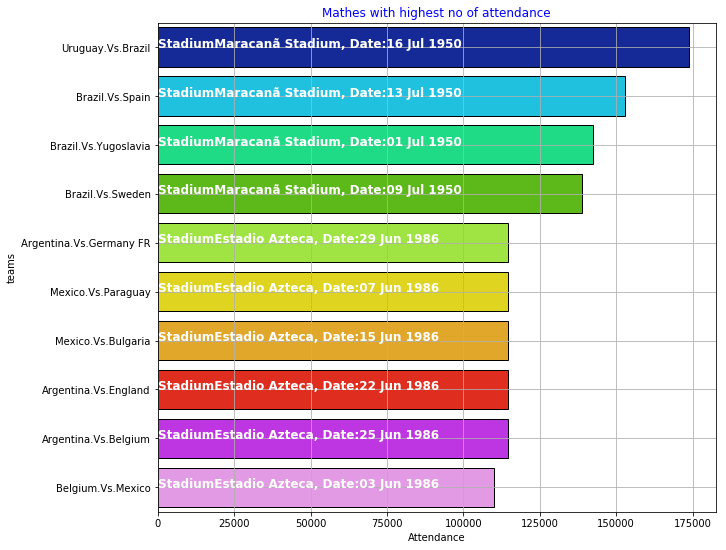

In [11]:
#matches with highest noof attendance 
h_att=matches.sort_values(by="Attendance",ascending=False)[:10]
h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att["Stadium"]=h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")
h_att["Datetime"]=h_att["Datetime"].str.split("-").str[0]
h_att["mt"]=h_att["Home Team Name"]+".Vs."+h_att["Away Team Name"]
plt.figure(figsize=(10,9))
ax=sns.barplot(y=h_att["mt"],x=h_att["Attendance"],palette="gist_ncar",
              linewidth=1,edgecolor="k"*len(h_att))
plt.ylabel("teams")
plt.xlabel("Attendance")
plt.title("Mathes with highest no of attendance",color='b')
plt.grid(True)
for i,j in enumerate("Stadium"+h_att["Stadium"]+", Date:"+h_att["Datetime"]):
    ax.text(.7,i,j,fontsize=12,color="white",weight="bold")
plt.show()

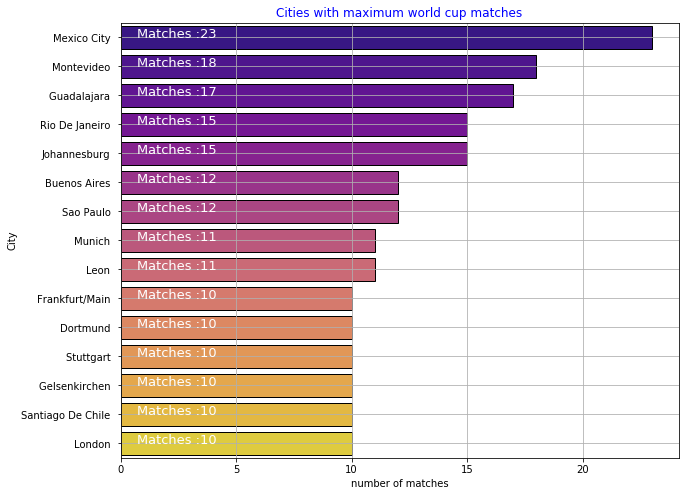

In [12]:
#cities sthat hosted highest world cup matches
mat_c=matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax=sns.barplot(y=mat_c["index"][:15],x=mat_c["City"][:15],palette="plasma",
              linewidth=1,edgecolor="k"*15)
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')
for i,j in enumerate("Matches :"+ mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize=13,color="w")
plt.show()    

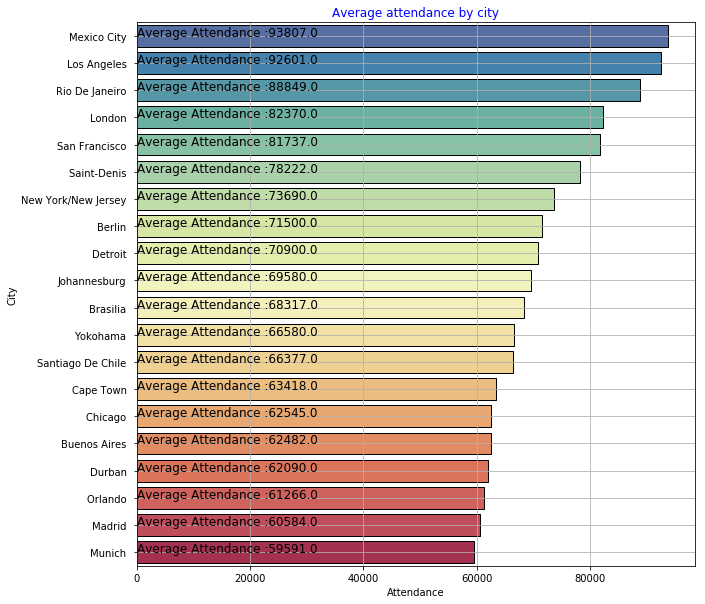

In [13]:
#average attendance by city
ct_at=matches.groupby("City")["Attendance"].mean().reset_index()
ct_at=ct_at.sort_values(by="Attendance",ascending=False)
ct_at
plt.figure(figsize=(10,10))
ax=sns.barplot("Attendance","City",data=ct_at[:20],linewidth=1,
              edgecolor="k"*20,palette="Spectral_r")
for i,j in enumerate("Average Attendance :"+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)
plt.title("Average attendance by city",color='b')
plt.show()

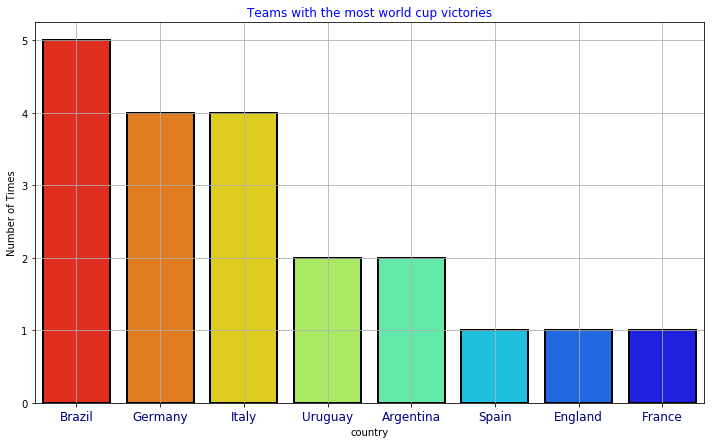

In [14]:
#teams with most world cup final victories
cups["Winner"]=cups["Winner"].replace("Germany FR","Germany")
cups["Runners-Up"]=cups["Runners-Up"].replace("Germany FR","Germany")
cou=cups["Winner"].value_counts().reset_index()
plt.figure(figsize=(12,7)),
sns.barplot("index","Winner",data=cou,palette="jet_r",linewidth=2,
           edgecolor="k"*len(cou))
plt.grid(True)
plt.ylabel("Number of Times")
plt.xlabel("country")
plt.title("Teams with the most world cup victories",color='b')
plt.xticks(color="navy",fontsize=12)
plt.show()


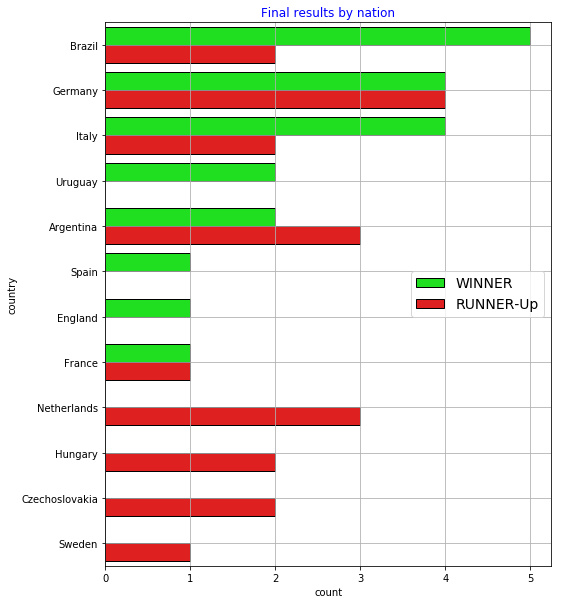

In [15]:
#world cup final result by nation
cou_w=cou.copy()
cou_w.columns=["country","count"]
cou_w["type"]="WINNER"
cou_r=cups["Runners-Up"].value_counts().reset_index()
cou_r.columns=["country","count"]
cou_r["type"]="Runner-Up"
cou_r["type"]="RUNNER-Up"
cou_t=pd.concat([cou_w,cou_r],axis=0)
plt.figure(figsize=(8,10))
sns.barplot("count","country",data=cou_t,hue="type",palette=["lime","r"]
           ,linewidth=1,edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

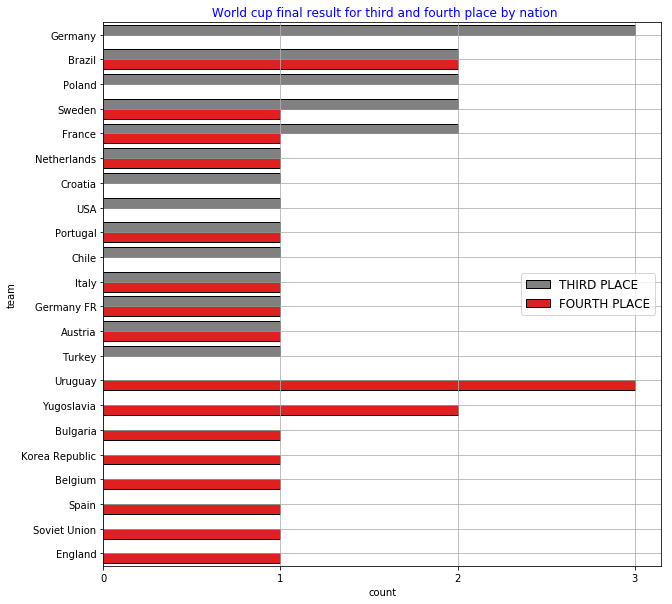

In [16]:
#world cup final result for third and fourth place by nation
thrd = cups["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = cups["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(10,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["grey","r"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='b')
plt.legend(loc="center right",prop={"size":12})
plt.show()

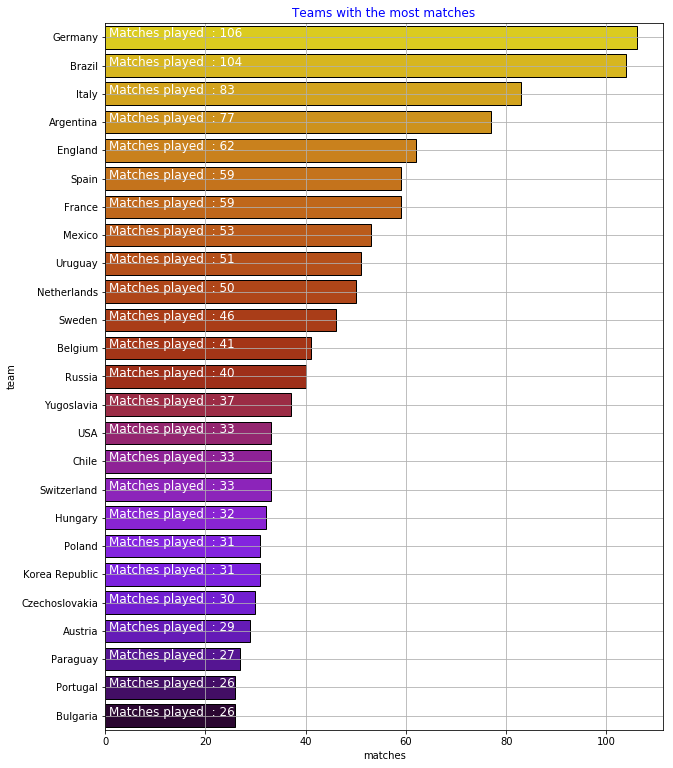

In [17]:
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")

ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(10,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='b')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")

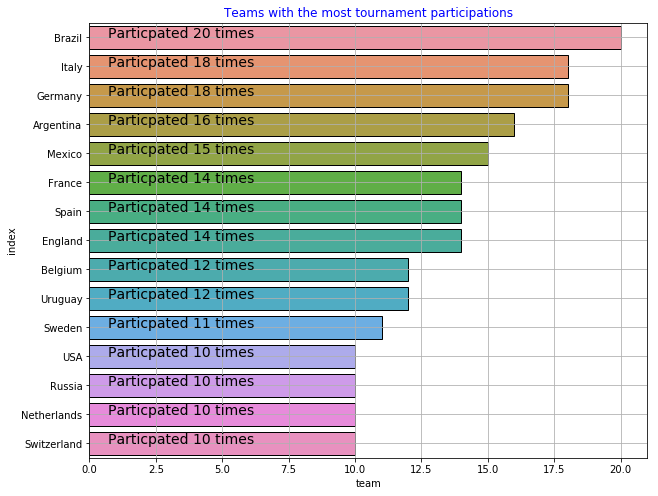

In [18]:
#teams with most tournament participations
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot("team","index",data=yt[:15],linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=14,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='b')
plt.show()

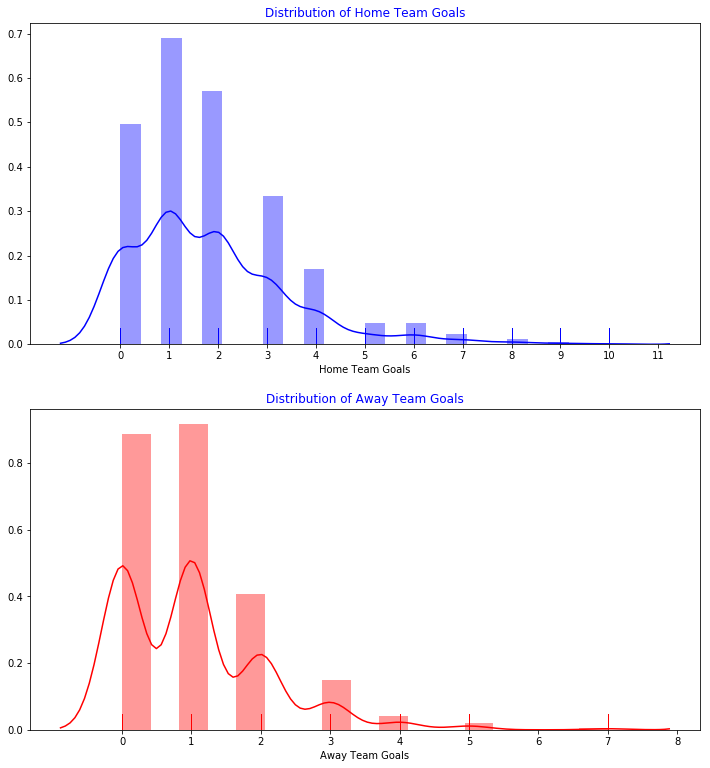

In [19]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.title("Distribution of Home Team Goals",color='b')


plt.subplot(212)
sns.distplot(matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of Away Team Goals",color='b')
plt.show()

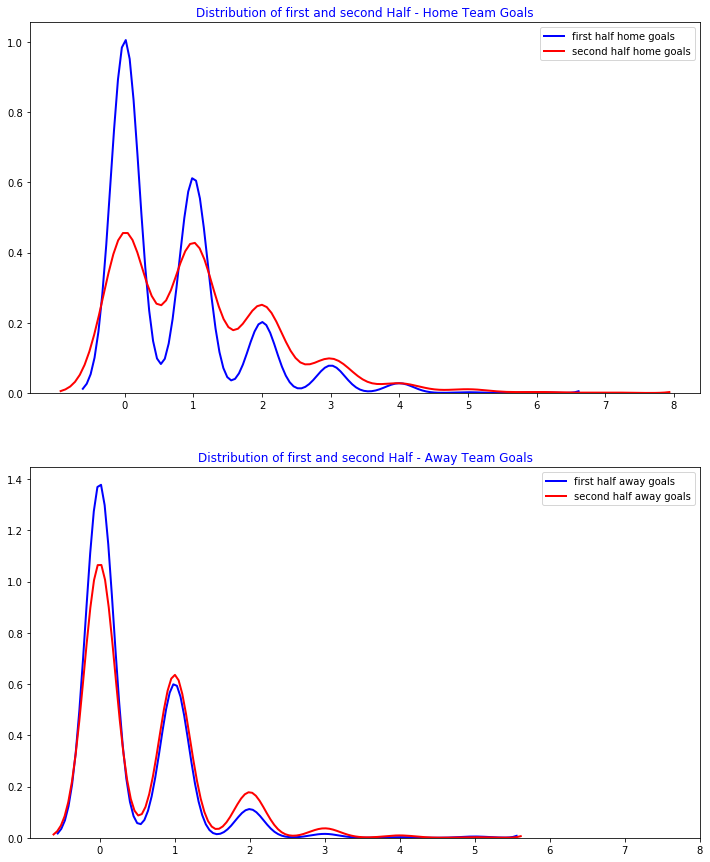

In [20]:
#Distribution of Half time Home and Away Team Goals
plt.figure(figsize=(12,15))
matches = matches.rename(columns={'Half-time Home Goals':"first half home goals",
                                  'Half-time Away Goals':"first half away goals"})

matches["second half home goals"] = matches["Home Team Goals"] - matches["first half home goals"]
matches["second half away goals"] = matches["Away Team Goals"] - matches["first half away goals"]

plt.subplot(211)
sns.kdeplot(matches["first half home goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half home goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Home Team Goals",color='b')

plt.subplot(212)
sns.kdeplot(matches["first half away goals"],color="b",linewidth=2)
sns.kdeplot(matches["second half away goals"],color="r",linewidth=2)
plt.xticks(np.arange(0,9,1))
plt.title("Distribution of first and second Half - Away Team Goals",color='b')
plt.show()

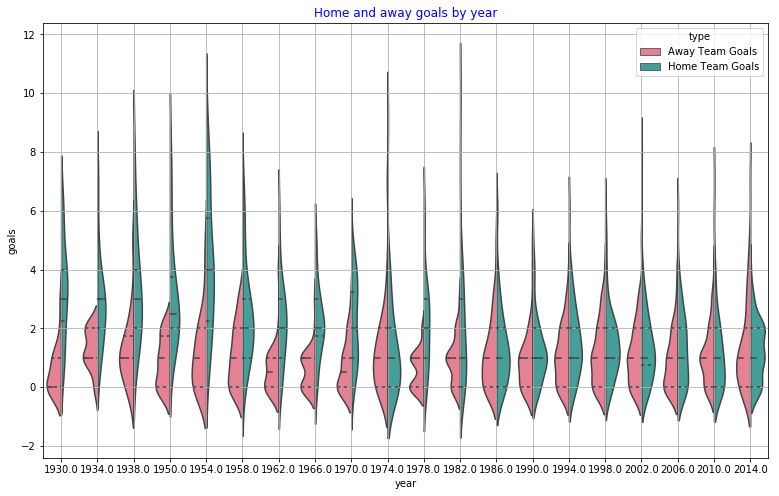

In [21]:
#Home and away goals by year


gh = matches[["Year","Home Team Goals"]]
gh.columns = ["year","goals"]
gh["type"] = "Home Team Goals"

ga = matches[["Year","Away Team Goals"]]
ga.columns = ["year","goals"]
ga["type"] = "Away Team Goals"

gls = pd.concat([ga,gh],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(gls["year"],gls["goals"],
               hue=gls["type"],split=True,inner="quart",palette="husl")
plt.grid(True)
plt.title("Home and away goals by year",color='b')
plt.show()

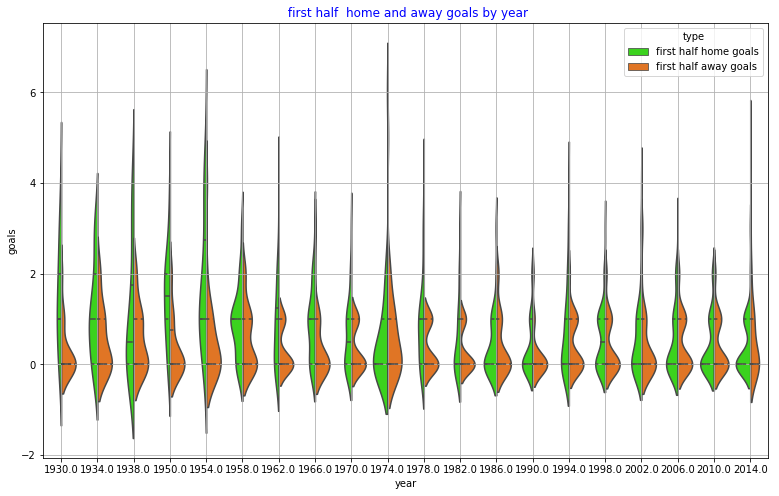

In [22]:
#first half home and away goals by year
hhg = matches[["Year",'first half home goals']]
hhg.columns = ["year","goals"]
hhg["type"] = 'first half home goals'

hag = matches[["Year",'first half away goals']]
hag.columns = ["year","goals"]
hag["type"] = 'first half away goals'

h_time = pd.concat([hhg,hag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(h_time["year"],h_time["goals"],hue=h_time["type"],
               split=True,inner="quart",palette="gist_ncar")
plt.grid(True)
plt.title(" first half  home and away goals by year",color='b')
plt.show()

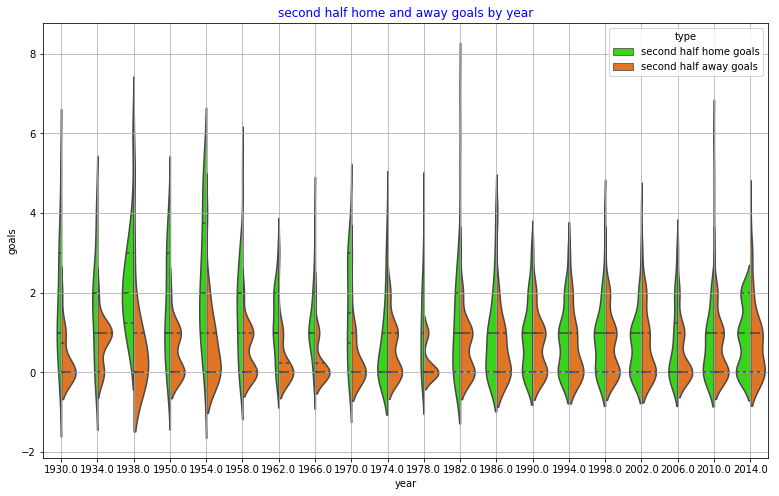

In [23]:
#second half home and away goals by year
shg = matches[["Year",'second half home goals']]
shg.columns = ["year","goals"]
shg["type"] = 'second half home goals'

sag = matches[["Year",'second half away goals']]
sag.columns = ["year","goals"]
sag["type"] = 'second half away goals'

s_time = pd.concat([shg,sag],axis=0)

plt.figure(figsize=(13,8))
sns.violinplot(s_time["year"],s_time["goals"],hue=s_time["type"],
               split=True,inner="quart",palette="gist_ncar")
plt.title("second half home and away goals by year",color='b')
plt.grid(True)
plt.show()

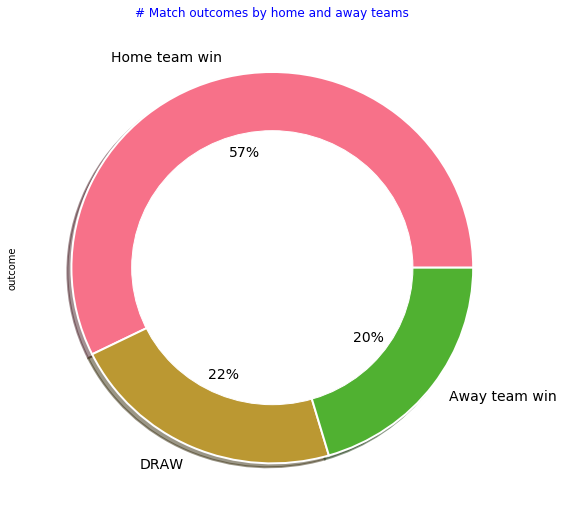

In [24]:
##matches outcomes by home and away teams
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)
plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()

In [25]:



def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
matches["win_team"]  = matches.apply(lambda matches:win_label(matches),axis=1)
matches["lost_team"] = matches.apply(lambda matches:lst_label(matches),axis=1)
lst = matches["lost_team"].value_counts().reset_index()
win = matches["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

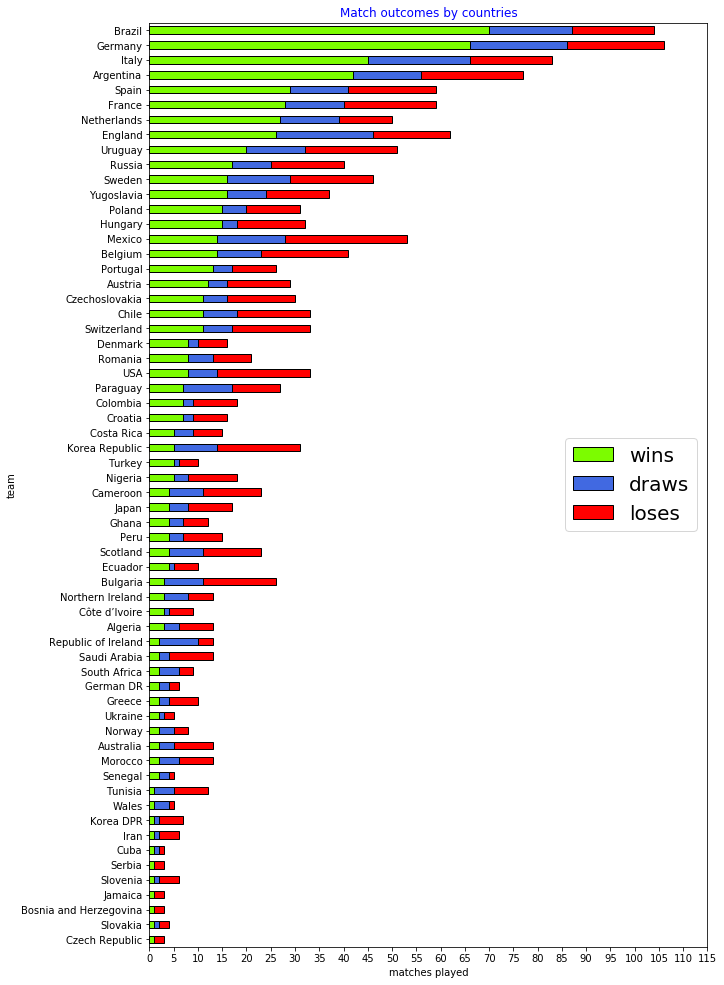

In [26]:
#matches outcomes by countries
wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":20})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='b')
plt.xlabel("matches played")
plt.show()

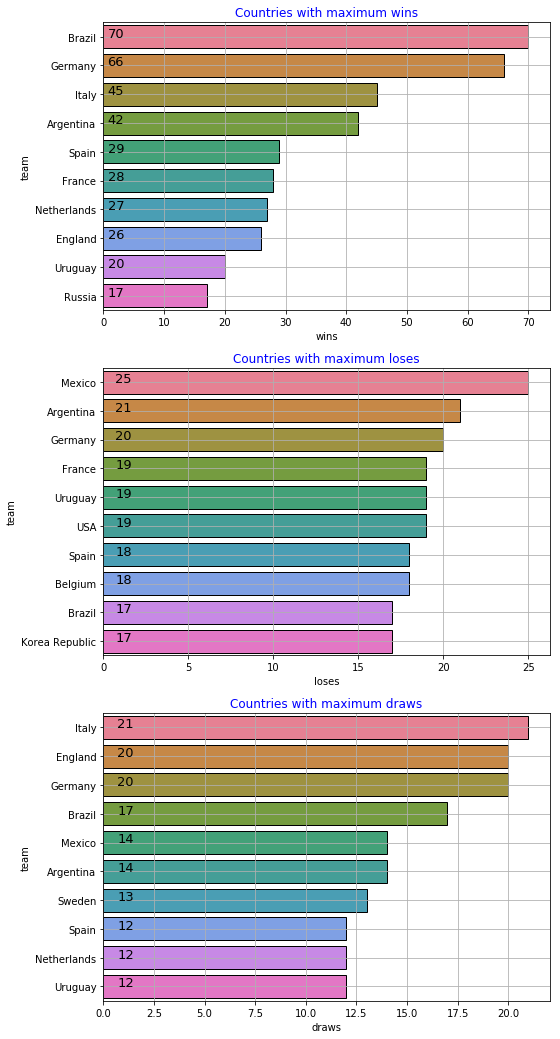

In [27]:
#countries with maximum wins,loses and draw matches in world cup
cols = [ 'wins', 'loses', 'draws']
length = len(cols)

plt.figure(figsize=(8,18))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(3,1,j+1)
    ax = sns.barplot(i,"team",data=wl1.sort_values(by=i,ascending=False)[:10],
                     linewidth=1,edgecolor="k"*10,palette="husl")
    for k,l in enumerate(wl1.sort_values(by=i,ascending=False)[:10][i]):
        ax.text(.7,k,l,fontsize=13)
    
    plt.grid(True)
    plt.title("Countries with maximum "+i,color='b')


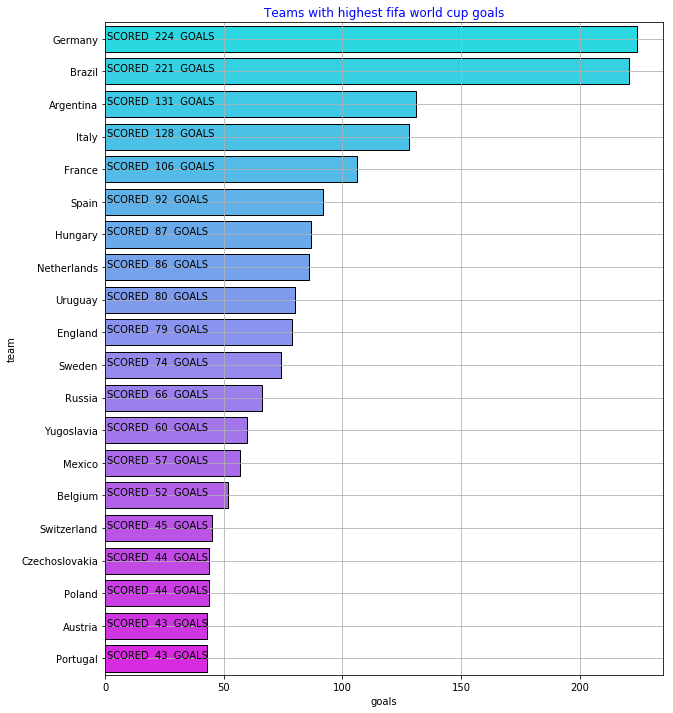

In [28]:
tt_gl_h = matches.groupby("Home Team Name")["Home Team Goals"].sum().reset_index()
tt_gl_h.columns = ["team","goals"]

tt_gl_a = matches.groupby("Away Team Name")["Away Team Goals"].sum().reset_index()
tt_gl_a.columns = ["team","goals"]

total_goals = pd.concat([tt_gl_h,tt_gl_a],axis=0)
total_goals = total_goals.groupby("team")["goals"].sum().reset_index()
total_goals = total_goals.sort_values(by="goals",ascending =False)
total_goals["goals"] = total_goals["goals"].astype(int)

plt.figure(figsize=(10,12))
ax= sns.barplot("goals","team",data=total_goals[:20],palette="cool",
                linewidth=1,edgecolor="k"*20)

for i,j in enumerate("SCORED  " +total_goals["goals"][:20].astype(str) + "  GOALS"):
    ax.text(.7,i,j,fontsize = 10,color="k")

plt.title("Teams with highest fifa world cup goals",color='b')
plt.grid(True)
plt.show()

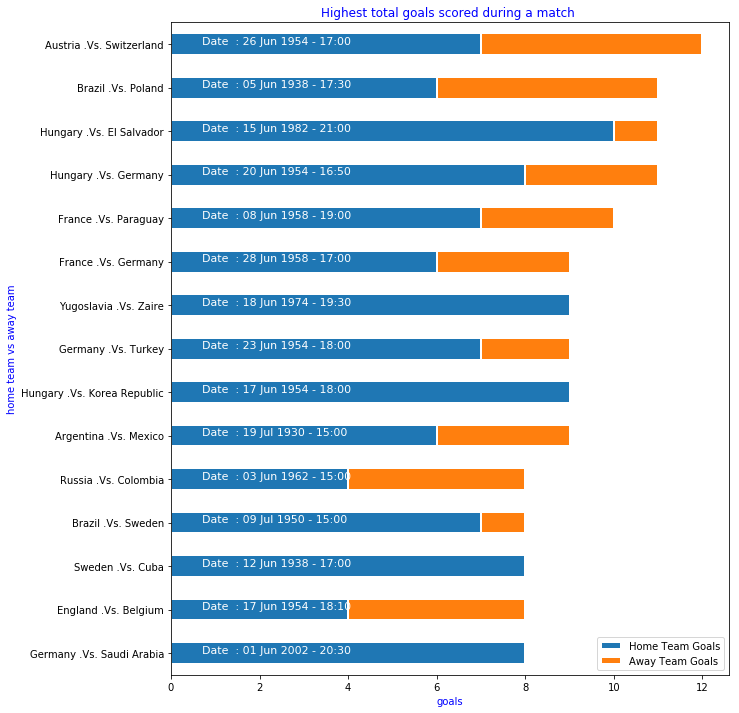

In [29]:
#highest total goal scored during a match
matches["total_goals"] = matches["Home Team Goals"] + matches["Away Team Goals"]
hig_gl = matches.sort_values(by="total_goals",ascending =False)[:15][['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
                                                                  'Home Team Goals', 'Away Team Goals', 'Away Team Name',"total_goals"]]
hig_gl["match"] = hig_gl["Home Team Name"] + " .Vs. " + hig_gl['Away Team Name']
hig_gl.index = hig_gl["match"]
hig_gl = hig_gl.sort_values(by="total_goals",ascending =True)
ax= hig_gl[["Home Team Goals","Away Team Goals"]].plot(kind="barh",stacked=True,
                                                       figsize=(10,12),linewidth=2,
                                                       edgecolor="w"*15)

plt.ylabel("home team vs away team",color="b")
plt.xlabel("goals",color="b")
plt.title("Highest total goals scored during a match ",color='b')

for i,j in enumerate("Date  : " + hig_gl["Datetime"]):
    ax.text(.7,i,j,color="w",fontsize=11)
    
plt.show()